In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("building.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) 

In [4]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,330.0,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987.0,130.0,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971.0,49552.0,1,1,0,Education,Education,Not provided


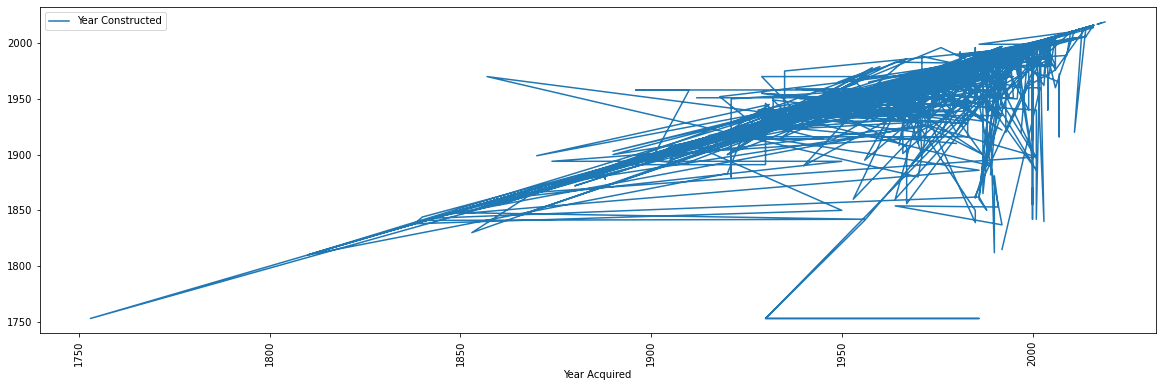

In [5]:
df.plot(x = "Year Acquired", y="Year Constructed", figsize=(20,6), rot=90)

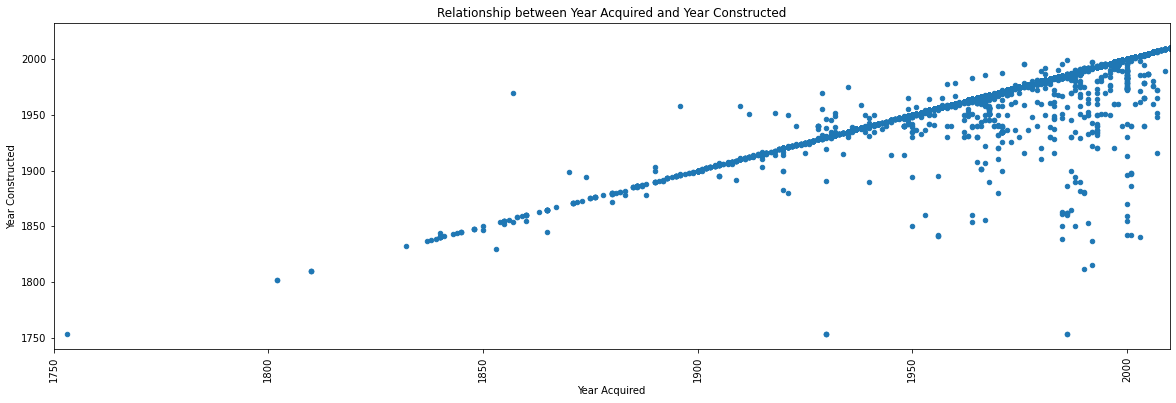

In [6]:
ax1 = df.plot(x = "Year Acquired", y="Year Constructed", figsize=(20,6), rot=90,kind='scatter')
ax1.set_xlim(1750, 2010)
plt.title('Relationship between Year Acquired and Year Constructed')
plt.xlabel('Year Acquired')
plt.ylabel('Year Constructed')
plt.show()

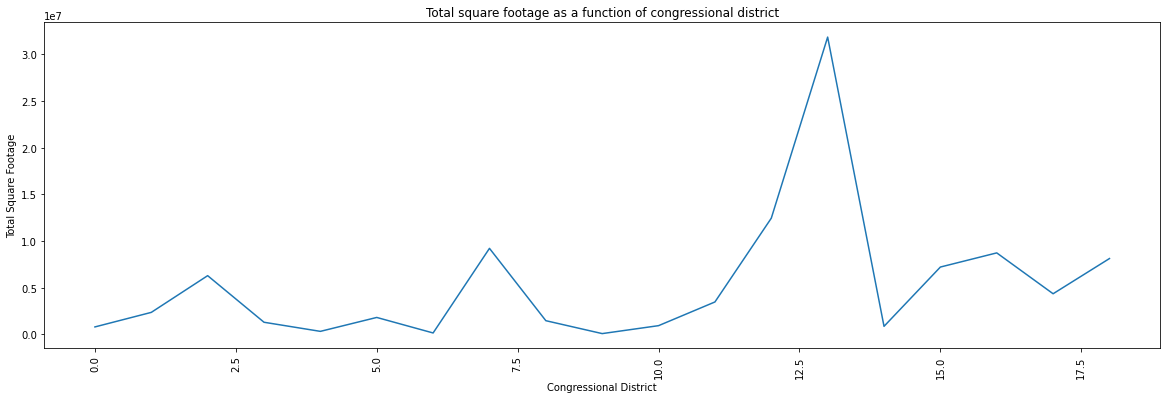

In [7]:
aggregated_data = df.groupby("Congress Dist")["Square Footage"].sum()
aggregated_data.plot(figsize=(20,6), rot=90)
plt.ylabel('Total Square Footage')
plt.xlabel('Congressional District')
plt.title('Total square footage as a function of congressional district')

plt.show()

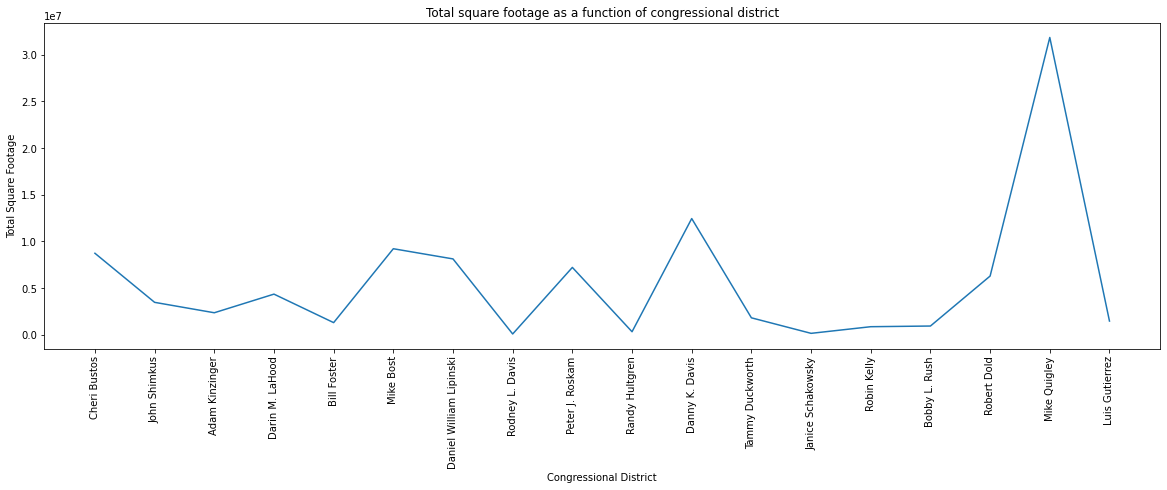

In [8]:
cong_dist_names = tuple([x for x in list(df['Congressional Full Name'].unique()) if isinstance(x,str)])
square_foot = np.arange(len(cong_dist_names))
# I look up the way to list out all the districts name. The reference link is here: https://alpha.iodide.io/notebooks/4401/?revision=64635
agg_data = df.groupby('Congressional Full Name')['Square Footage'].sum()
plt.figure(figsize=(20,6))
plt.plot(square_foot, agg_data)
plt.xticks(square_foot, cong_dist_names, rotation=90)
plt.title('Total square footage as a function of congressional district')
plt.xlabel('Congressional District')
plt.ylabel('Total Square Footage')
plt.show()

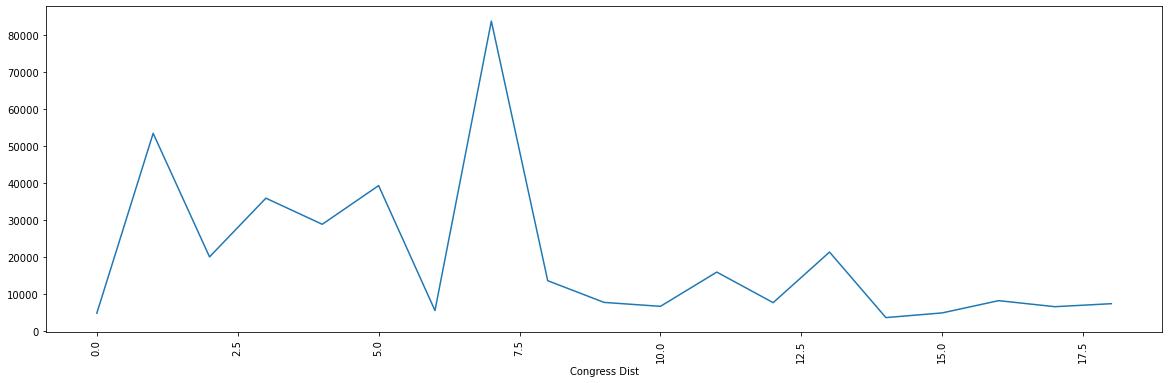

In [9]:
aggregated_data_average = df.groupby("Congress Dist")["Square Footage"].mean()
aggregated_data_average.plot(figsize=(20,6), rot=90)

In [10]:
df['Square Footage per floor'] = df['Square Footage']/df['Total Floors']

Text(0, 0.5, 'Square Footage per Floor')

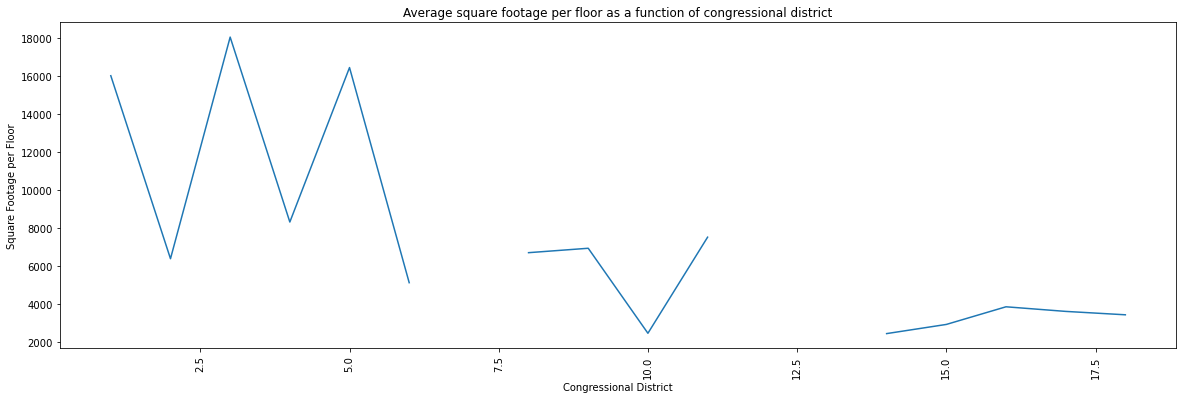

In [13]:
aggregated_data_average1 = df.groupby("Congress Dist")["Square Footage per floor"].mean()
aggregated_data_average1.plot(figsize=(20,6), rot=90)
plt.title('Average square footage per floor as a function of congressional district')
plt.xlabel('Congressional District')
plt.ylabel('Square Footage per Floor')

(1750.0, 2010.0)

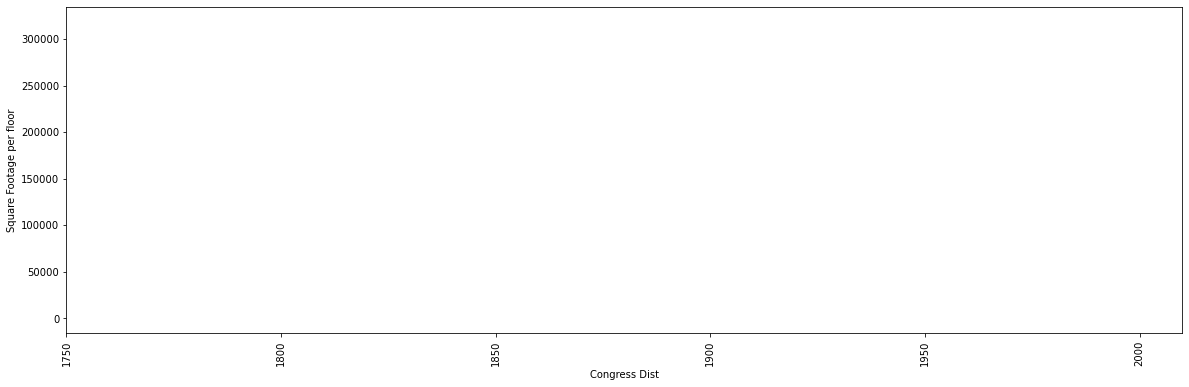

In [14]:
ax2 = df.plot(x = "Congress Dist", y="Square Footage per floor", figsize=(20,6), rot=90,kind='scatter')
ax2.set_xlim(1750, 2010)